 # Project Name - Apple and Google tweet Sentiment Analysis.

# Project Summary
This project aims to develop a sentiment classification model that identifies customer emotions—positive, neutral, or negative from textual feedback. Understanding sentiment trends is critical for organizations seeking to improve customer satisfaction, brand perception, and product strategy. The dataset used contains pre-labeled text data reflecting user opinions, making it highly suited for Natural Language Processing (NLP) applications in business intelligence and customer experience management.

The data underwent thorough cleaning and preparation, including lowercasing, punctuation removal, and stopword filtering, to enhance signal quality. A TF-IDF vectorizer was used to transform the text into a numerical format, while RandomOverSampler addressed class imbalance issues. Multiple models—Logistic Regression, Random Forest, Naive Bayes, XGBoost, and CNN-LSTM were evaluated. Through hyperparameter optimization using GridSearchCV, the Randomized Logistic Regression model emerged as the most balanced performer.

The final model(Randomized Logistic Regression  - with RandomSearchCV) achieved a weighted F1-score of 0.652, accuracy of 0.643, and a train–test accuracy gap of 0.1899, indicating fair generalization. It performs especially well in detecting neutral sentiments, with moderate accuracy in identifying positive and negative emotions. These insights can guide businesses in monitoring customer sentiment trends, prioritizing service improvements, and informing marketing strategies based on real-time feedback patterns.

Limitations include residual class imbalance and limited contextual understanding due to TF-IDF representation. Future enhancements could integrate transformer-based models and synthetic data augmentation to improve minority emotion detection and overall robustness.

## 1. Business Understanding
### 1.1 Business Overview
In the modern technological era, social media platforms such as Twitter(x) have become powerful sources where users share real-time opinions on brands and products. Companies such as Apple and Google, both global leaders  in technology and innovation, benefit greatly from understanding these public sentiments. Analyzing tweets about them helps reveal consumer opinions, trends and brand perceptions. Since manually reviewing  thousands of tweets is inefficient, automated sentiment analysis provides an effective solution. Classifing tweets as positive,negative or neutral to help companies monitor reputation, improve customer satisfaction  and make informed strategic decisions.

### 1.2 Problem Statement
Twitter(x) is a space where people share their opinions about brands and products. For global technology companies like Apple and Google, these tweets offer valuable insights into customer satisfaction, brand reputation and customer loyalty. However, the large volume of unstructured data makes it difficult to manually analyze the public sentiment in real time. To solve this problem, this project aims at developing an automated sentiment analysis model using Natural Language Processing(NLP) to classify tweets as positive, negative or neutral. This will help the companies better understand consumer perception, respond to feedback quickly and generally improve their products and overall Brand Image.
### 1.3 Business Objectives 
 #### 1.3.1 Main Objective
To build a model that can rate the sentiment of a Tweet based on its content
 #### 1.3.2 Specific Objectives
* To establish patterns and relationships between tweet content and corresponding sentiment categories.
* To identify whether the special characters potray meaningful info.
* To determine the main sentiment drivers.
* To determine which words, phrases or subjects have the greatest influence on whether people see a brand favourably or unfavourably.
* To generate meaningful insights that reflect customer attitude and brand perception in real time.

 #### 1.3.3 Research Questions
1. What patterns and relationships exist between tweet content and the sentiment categories?
2. Do special characters such as @, # and links carry any meaningful information that affects tweet sentiment?
3. What specific features are the main targets of users' emotions towards apple and google?
4. Which machine learning model performs the best in classifying tweet sentiment based on metrics such as accuracy, F1-score, precision and recall?
5. What are the main words, phrases or themes that drive positive/negative sentiment towards these brands and how do these patterns change over time?

### 1.4 Success Criteria
* The project will be successful if it develops an accurate and reliable sentiment classification model that achieves an F1-weighted of 75%% and above and maintains balanced precision and recall across all the sentiment classes.
* Success will also be measured by the model's ability to generalize well to unseen data, minimize missclassification between positive and negative tweets and provide actionable insights that help improve customer services and management of the brand.mrab



## 2. Data Understanding
### 2.1 Data source and Description
- **Source:** This dataset is from CrowdFlower via <a href="https://data.world/crowdflower/brands-and-product-emotions" target="_blank">data.world</a> containing human raters sentiments.

- **Description** The dataset has sentiments from over 9000 twitter users with each row containing a  users tweet_text, emotion_in_tweet_is_directed_at and emotion. Our main target is to use the text and train our model to predict the emotion from the tex

### 2.2 Shape
* The dataset shape is (9093, 4).
* The dataset contains the following columns:
1. tweet_text
2. emotion_in_tweet_is_directed_at
3. is_there_an_emotion_directed_at_a_brand_or_product
   
### 2.3 Datatypes
  * All the columns have object dtype.  t.


## 3. Data Preparation

### 3.1 Data Loading
* Import necessary libraries
* Load Dataset

In [1]:
# importing the necessary libraries
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import FreqDist
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc, f1_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

2025-10-18 18:44:19.806442: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-18 18:44:22.530895: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
# Loading Dataset 
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')

### 3.2 Data Exploration

In [3]:
# previewing the dataset
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# checking the dimension of the dataset
df.shape

(9093, 3)

In [5]:
# checking the overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [6]:
# checking for missing values
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

* We have missing values in tweet_text and emotion_in_tweet_is_directed_at columns.

In [7]:
# checking for duplicates
df.duplicated().sum()

22

* We have 22 duplicates.

### 3.3 Data Cleaning

#### 3.3.1 Handling duplicates
* Since duplicate tweets can bias the model by overrepresenting a particular sentiment, we will drop them.

In [8]:
# removing duplicates
df.drop_duplicates()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


#### 3.3.2 Handling missing values

Missing data on where emotion is directed to: 5802/9093 (63.8%)


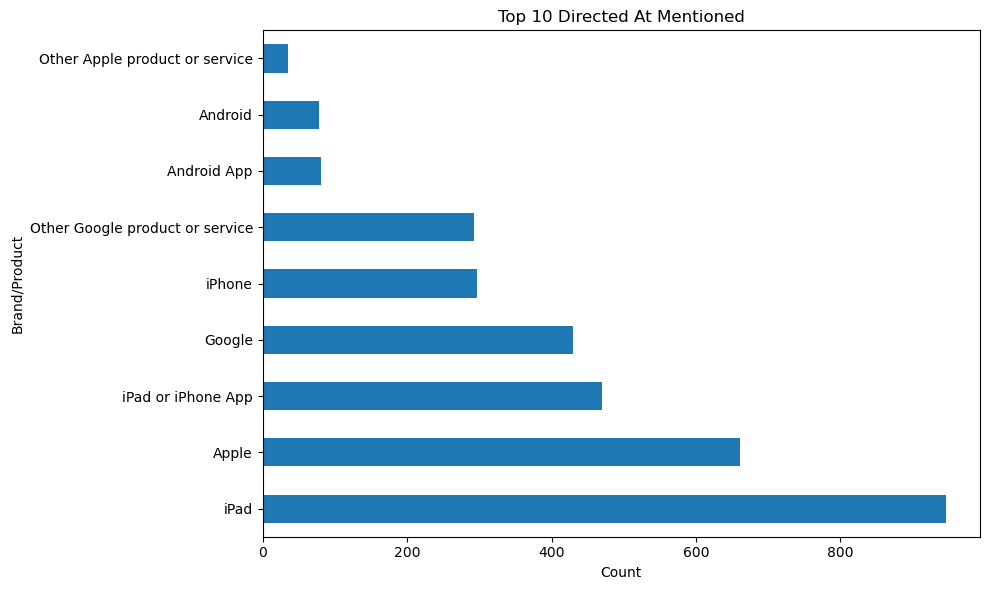

In [9]:
# Missingness analysis
missing_brand = df['emotion_in_tweet_is_directed_at'].isna().sum()
total_length = len(df)
print(f"Missing data on where emotion is directed to: {missing_brand}/{total_length} ({missing_brand/total_length:.1%})")

# Plot for the non-missing values
directed_at_counts = df['emotion_in_tweet_is_directed_at'].value_counts().head(10)

if not directed_at_counts.empty:
    plt.figure(figsize=(10, 6))
    directed_at_counts.plot(kind='barh')
    plt.title('Top 10 Directed At Mentioned')
    plt.xlabel('Count')
    plt.ylabel('Brand/Product')
    plt.tight_layout()
    plt.show()
else:
    print("No non-missing values to plot")

Here, users seem to have a emotions towards iPas Apple and google products consequtively as compared to other brands and products. The column seem to have a huge, missing value percentage of 63.8%. Since we would like to see how the brand or product affects the users we have to impute the missing values in 'emotion_in_tweet_is_directed_at' with 'Unknown'.

In [10]:
# imputing for emotion_in_tweet_is_directed_at with unknown since we would like to see how the brand or product affects users
df['emotion_in_tweet_is_directed_at'].fillna('unknown',inplace=True)
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",unknown,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",unknown,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,unknown,No emotion toward brand or product


#### NB 
We will be ignoring the 'Unknown' during our interpretations

In [11]:
# Dropping the missing value in tweet_text
df = df.dropna(subset=['tweet_text'])

In [12]:
df = df.copy()

# Combine the two sentiment categories into one called 'Neutral'
df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].replace({
    "No emotion toward brand or product": "Neutral", 
    "I can't tell": "Neutral"
})

# Check the updated value counts
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())

is_there_an_emotion_directed_at_a_brand_or_product
Neutral             5544
Positive emotion    2978
Negative emotion     570
Name: count, dtype: int64


In the above we basically combining the two columns because they mean the same thing, the 'No emotion toward brand or product' and 'I can't tell'

### 3.4 Exploratory Data Analysis

#### 3.4.1 Univariate Analysis

Text(0.5, 1.0, 'Emotion Proportions')

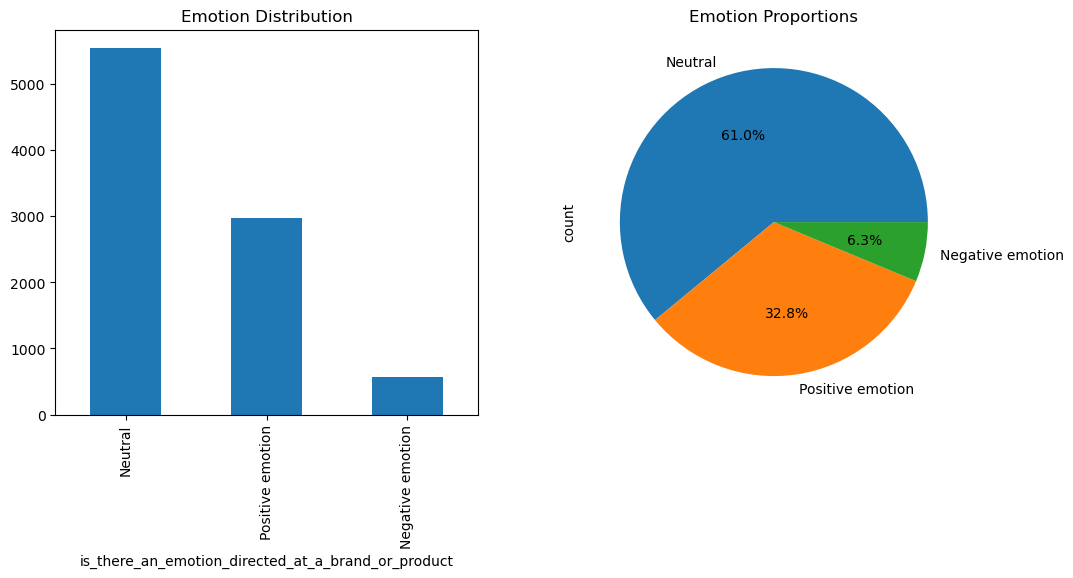

In [13]:
# Distribution of emotions in the dataset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='bar')
plt.title('Emotion Distribution')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Emotion Proportions')

The above shows the distribution of our target variable ~'s_there_an_emotion_directed_at_a_brand_or_product'. It seems to be imbalanced with the neutral being the majority and negative having the minority representation of datapoints. positive emotion is moderately represented.

In [14]:
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
unknown                            5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: count, dtype: int64

In [15]:
data = df

CROSS-TABULATION: Emotion Target vs Sentiment
____________________________________________________________
is_there_an_emotion_directed_at_a_brand_or_product  Negative emotion  Neutral  \
emotion_in_tweet_is_directed_at                                                 
Android                                                            8        1   
Android App                                                        8        1   
Apple                                                             95       23   
Google                                                            68       16   
Other Apple product or service                                     2        1   
Other Google product or service                                   47       10   
iPad                                                             125       28   
iPad or iPhone App                                                63       10   
iPhone                                                           103       10   
un

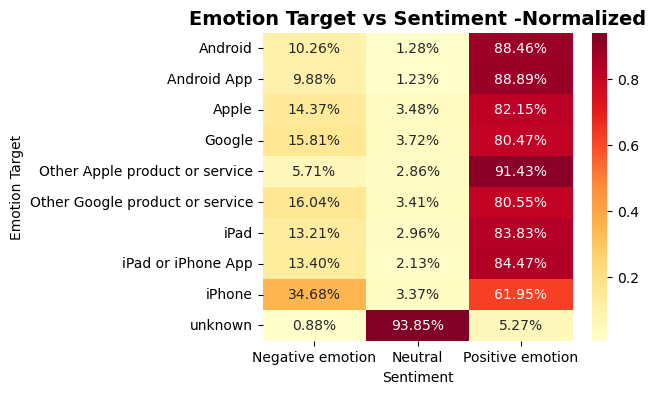

In [16]:
# Cross-tabulation with sentiment
print("CROSS-TABULATION: Emotion Target vs Sentiment")
print("_" * 60)
crosstab = pd.crosstab(
    data['emotion_in_tweet_is_directed_at'], 
    data['is_there_an_emotion_directed_at_a_brand_or_product'],
    margins=True
)
print(crosstab)

# Heatmap of Cross-tabulation
fig, axes = plt.subplots(figsize=(5,4))
crosstab_normalized = pd.crosstab(
    data['emotion_in_tweet_is_directed_at'], 
    data['is_there_an_emotion_directed_at_a_brand_or_product'],
    normalize='index'
)
sns.heatmap(crosstab_normalized, annot=True, fmt='.2%', cmap='YlOrRd', axes=axes)
axes.set_title('Emotion Target vs Sentiment -Normalized', fontsize=14, fontweight='bold')
axes.set_xlabel('Sentiment')
axes.set_ylabel('Emotion Target')
plt.show()

Generally the positive emotion seem to have the highest influence on all brands and products it leads in position followed by negative emotion, no emotiontowards a brand takes the 3rd position and i can't tell has the least percentages towards all the brands and products and nothing at all on others. Android app and android products are the most infuenced by positive emotion, this might mean that users are more likely to use these products or brand. Iphone has the highest negative emotion though only a 34%, it means some users are not very satisfied with the product.

In [17]:
# Calculating word count
df = df.copy() 
df['char_count'] = df['tweet_text'].str.len()
df['word_count'] = df['tweet_text'].apply(lambda x: len(str(x).split()))
print(df[['tweet_text', 'char_count', 'word_count']].head())

                                          tweet_text  char_count  word_count
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...         127          23
1  @jessedee Know about @fludapp ? Awesome iPad/i...         139          22
2  @swonderlin Can not wait for #iPad 2 also. The...          79          15
3  @sxsw I hope this year's festival isn't as cra...          82          15
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...         131          17


In [18]:
# Does special characters @.# and link potry meaningful information?
from collections import Counter
# 1. User Mentions (@) Analysis
def extract_mentions(text):
    #Extract all @mentions from text
    if isinstance(text, str):
        return re.findall(r'@\w+', text.lower())
    return []

# Extracting all  the mentions
all_mentions = []
for text in data['tweet_text']:
    all_mentions.extend(extract_mentions(text))

# Count most common mentions
mention_counter = Counter(all_mentions)
top_mentions = mention_counter.most_common(10)

print("Top 10 most mentioned user/brands")
print("=" * 60)
for mention, count in top_mentions:
    print(f"{mention}: {count} times")

# Mentions by sentiment
print("Top mention by sentiment")
print("=" * 60)
sentiments = data['is_there_an_emotion_directed_at_a_brand_or_product'].unique()
for sentiment in sentiments:
    sentiment_data = data[data['is_there_an_emotion_directed_at_a_brand_or_product'] == sentiment]
    sentiment_mentions = []
    for text in sentiment_data['tweet_text']:
        sentiment_mentions.extend(extract_mentions(text))
    
    if sentiment_mentions:
        top_sentiment_mentions = Counter(sentiment_mentions).most_common(10)
        print(f"\n--- Sentiment: '{sentiment}' ---")
        for mention, count in top_sentiment_mentions:
            print(f"  {mention}: {count}")

Top 10 most mentioned user/brands
@mention: 7110 times
@madebymany: 5 times
@garyvee: 3 times
@schmittastic: 3 times
@gowalla: 2 times
@jerranalley: 2 times
@tbalinas: 2 times
@mentionc: 2 times
@mentione: 2 times
@mentionr: 2 times
Top mention by sentiment

--- Sentiment: 'Negative emotion' ---
  @mention: 313
  @wesley83: 1
  @sxsw: 1

--- Sentiment: 'Positive emotion' ---
  @mention: 2187
  @madebymany: 5
  @gowalla: 2
  @garyvee: 2
  @mentionr: 2
  @jessedee: 1
  @fludapp: 1
  @swonderlin: 1
  @sxtxstate: 1
  @thenextweb: 1

--- Sentiment: 'Neutral' ---
  @mention: 4610
  @schmittastic: 3
  @mentionc: 2
  @mentione: 2
  @iampaintedface: 2
  @h0u5t0n: 2
  @aclu: 2
  @aarpbulletin: 2
  @mentionw: 2
  @teachntech00: 1


Special character @ seem to have meaningful information as we can see the most tagged sentiment in relation to brand or product in as much there is no direct link in most cases for emotion to the tagged user or brand

In [19]:
# 2. Hashtags (#) Analysis
def extract_hashtags(text):
    #Extract all #hashtags from text
    if isinstance(text, str):
        return re.findall(r'#\w+', text.lower())
    return []

# Extracting  all hashtags
all_hashtags = []
for text in data['tweet_text']:
    all_hashtags.extend(extract_hashtags(text))

# Count most common hashtags
hashtag_counter = Counter(all_hashtags)
top_hashtags = hashtag_counter.most_common(10)

print("Top 10 most popular hashtags")
print("=" * 60)
for hashtag, count in top_hashtags:
    print(f"{hashtag}: {count} times")

# Hashtags by sentiment
print("Top Hashtags by Sentiments")
print("=" * 60)
for sentiment in sentiments:
    sentiment_data = data[data['is_there_an_emotion_directed_at_a_brand_or_product'] == sentiment]
    sentiment_hashtags = []
    for text in sentiment_data['tweet_text']:
        sentiment_hashtags.extend(extract_hashtags(text))
    
    if sentiment_hashtags:
        top_sentiment_hashtags = Counter(sentiment_hashtags).most_common(10)
        print(f"\n Sentiment: '{sentiment}' ")
        for hashtag, count in top_sentiment_hashtags:
            print(f"  {hashtag}: {count}")


Top 10 most popular hashtags
#sxsw: 9120 times
#apple: 416 times
#google: 322 times
#sxswi: 318 times
#ipad2: 296 times
#iphone: 267 times
#ipad: 264 times
#android: 132 times
#austin: 112 times
#circles: 98 times
Top Hashtags by Sentiments

 Sentiment: 'Negative emotion' 
  #sxsw: 570
  #ipad: 19
  #apple: 15
  #iphone: 13
  #google: 13
  #tapworthy: 12
  #sxswi: 11
  #fail: 11
  #japan: 9
  #circles: 8

 Sentiment: 'Positive emotion' 
  #sxsw: 2998
  #apple: 177
  #ipad2: 130
  #sxswi: 96
  #ipad: 93
  #iphone: 82
  #google: 69
  #android: 43
  #austin: 40
  #tech: 28

 Sentiment: 'Neutral' 
  #sxsw: 5552
  #google: 240
  #apple: 224
  #sxswi: 211
  #iphone: 172
  #ipad2: 158
  #ipad: 152
  #android: 85
  #circles: 73
  #austin: 71


Special character # seem to have a meaningful information in regard to product or brand in relation to emotion. Like in the above the top ten hashtags are in the negative emotion, this links us to the hashtags on the product and brand and sxsw seem to have the most being tagged and having a negative emotion. The preceeding products can be seen in the above.

Link Analysis
Total tweets: 9092
Tweets with links: 25
Percentage with links: 0.27%

 Links by Sentiment 
Negative emotion: 0/570 (0.00%)
Positive emotion: 14/2978 (0.47%)
Neutral: 11/5544 (0.20%)


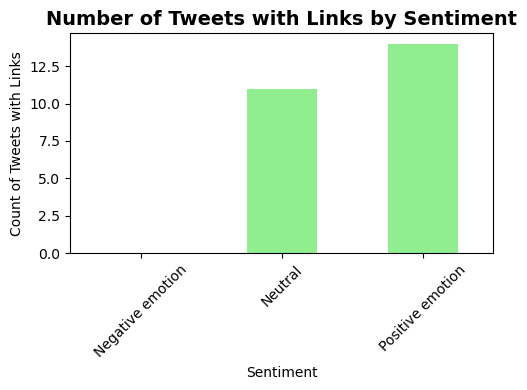

In [20]:
# 3.  Links (http/https) Analysis
def contains_link(text):
    #Check if text contains a URL
    if isinstance(text, str):
        return bool(re.search(r'http[s]?://\S+', text))
    return False

# Count tweets with links
data['contains_link'] = data['tweet_text'].apply(contains_link)
total_with_links = data['contains_link'].sum()
total_tweets = len(data)
percentage_with_links = (total_with_links / total_tweets) * 100

print("Link Analysis")
print("=" * 60)
print(f"Total tweets: {total_tweets}")
print(f"Tweets with links: {total_with_links}")
print(f"Percentage with links: {percentage_with_links:.2f}%")

# Links by sentiment
print("\n Links by Sentiment ")
for sentiment in sentiments:
    sentiment_data = data[data['is_there_an_emotion_directed_at_a_brand_or_product'] == sentiment]
    links_count = sentiment_data['contains_link'].sum()
    sentiment_total = len(sentiment_data)
    percentage = (links_count / sentiment_total * 100) if sentiment_total > 0 else 0
    print(f"{sentiment}: {links_count}/{sentiment_total} ({percentage:.2f}%)")

fig ,axes = plt.subplots(figsize=(5,4))
link_by_sentiment = data.groupby('is_there_an_emotion_directed_at_a_brand_or_product')['contains_link'].sum()
link_by_sentiment.plot(kind='bar', ax=axes, color='lightgreen')
axes.set_title('Number of Tweets with Links by Sentiment', fontsize=14, fontweight='bold')
axes.set_xlabel('Sentiment')
axes.set_ylabel('Count of Tweets with Links')
axes.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


Ageneral observation can be made that there is no much impact on links on tweets. But the few tweets that has link with them show a relationship on tweet by sentiment either positive or no emotion towards a brand or product

### 3.5 Text Preprocessing

In [21]:
# Downloading necessary resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

def preprocess_text(text):
    # lowercase
    text = text.lower()
    # remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # remove mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # remove hashtags
    text = re.sub(r'#', '', text)
    # remove punctuation
    text = re.sub(r'[^a-z0-9\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return ' '.join(lemmatized_tokens)

In [22]:
# Applying text preprocessing function to the original tweet text
df['cleaned_text'] = df['tweet_text'].apply(preprocess_text)
print(df[['tweet_text', 'cleaned_text']].head())

                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

                                        cleaned_text  
0  3g iphone 3 hr tweeting riseaustin dead need u...  
1  know awesome ipadiphone app youll likely appre...  
2                         wait ipad 2 also sale sxsw  
3  hope year festival isnt crashy year iphone app...  
4  great stuff fri sxsw marissa mayer google tim ...  


### 3.6 Feature Engineering

In [23]:
from nltk import bigrams
from collections import Counter

# Tokenizing all cleaned tweets into one list
words = ' '.join(df['cleaned_text']).split()

# Generating bigrams
bigram_list = list(bigrams(words))

# Counting most common bigrams
bigram_counts = Counter(bigram_list)
print(bigram_counts.most_common(10))

[(('sxsw', 'link'), 961), (('ipad', '2'), 947), (('link', 'sxsw'), 872), (('sxsw', 'rt'), 689), (('apple', 'store'), 588), (('link', 'rt'), 540), (('social', 'network'), 455), (('new', 'social'), 417), (('sxsw', 'apple'), 368), (('store', 'sxsw'), 343)]


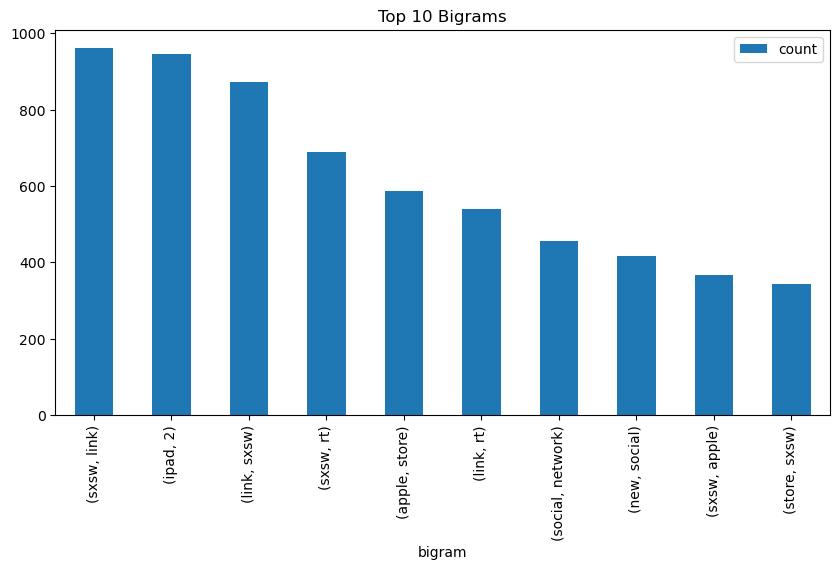

In [24]:
# Visualizing bigrams
bigram_df = pd.DataFrame(bigram_counts.most_common(10), columns=['bigram', 'count'])
bigram_df.plot.bar(x='bigram', y='count', figsize=(10,5), title='Top 10 Bigrams')
plt.show()


* Checking word association strength

In [25]:
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import BigramAssocMeasures

# Initialize bigram measures and finder
bigram_measures = BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_words(words)

# Filter bigrams that occur less than 50 times
bigram_finder.apply_freq_filter(50)

# Score bigrams using PMI
bigram_pmi_scored = bigram_finder.score_ngrams(bigram_measures.pmi)

# Display top bigrams
print(bigram_pmi_scored[:10])

[(('includes', 'uberguide'), 10.551679796104581), (('marissa', 'mayer'), 8.802357685327943), (('network', 'called'), 7.654555746141707), (('opening', 'temporary'), 7.567609086615015), (('possibly', 'today'), 7.482954965398733), (('set', 'open'), 7.361844629133794), (('social', 'network'), 7.307224807265115), (('circle', 'possibly'), 7.302864930793955), (('launch', 'major'), 7.1663434938880854), (('called', 'circle'), 7.146632513766917)]


* Since the PMI of all the bigrams is high, it means that they are rare individually but frequent together.

[('sxsw', 9509), ('link', 4295), ('rt', 2959), ('google', 2522), ('ipad', 2409), ('apple', 2249), ('iphone', 1512), ('store', 1504), ('2', 1147), ('new', 1089), ('austin', 962), ('app', 807), ('amp', 722), ('launch', 688), ('social', 641), ('circle', 641), ('popup', 599), ('today', 573), ('android', 566), ('network', 471)]


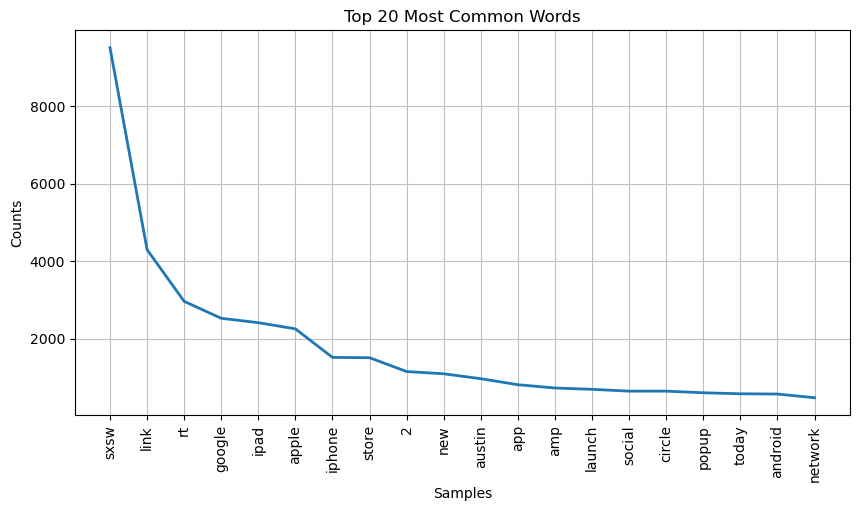

In [26]:
# Computing frequency distribution
freq_dist = FreqDist(words)

# Showing top 20 most common words
print(freq_dist.most_common(20))

# Visualizing
plt.figure(figsize=(10,5))
freq_dist.plot(20, title='Top 20 Most Common Words')
plt.show()

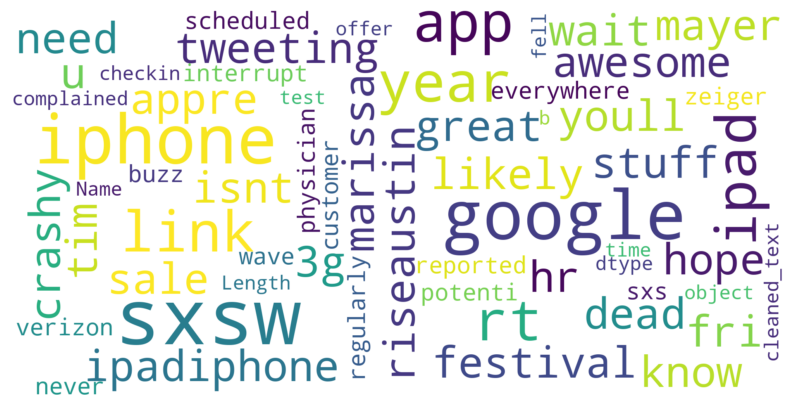

In [27]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', random_state=21, max_font_size=40,scale=5).generate(str(df['cleaned_text']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

* The two visualization show that **SXSW**, **link**, **rt**, **google**, **ipad**, **apple** and **Iphone** are the most common words in our preprocessed tweet dataset. 

In [28]:
#  Creating a new feature 'contains_sxsw' to check if the word 'sxsw' appears in each tweet
df['contains_sxsw'] = df['cleaned_text'].apply(lambda x: 1 if 'sxsw' in x else 0)
print(df['contains_sxsw'].value_counts())

contains_sxsw
1    9084
0       8
Name: count, dtype: int64


* 1 represents contains while 0 means does not contain 
*  SXSW(South by southwest event) is dominating the dataset.

* Almost all tweets contain sxsw.
* Since it's more of a contextual keyword for the event, we are going to drop given that it does not add sentiment meaning.It can bias TF-IDF and other vectorization methods, making the model focus on 'sxsw' instead of meaningful product-related words.
* We are also going to drop rt(which is a structure and it appears when someone retweets a tweet) and link(placeholder for URls) since our focus are on brands sentiments.

In [29]:
# dropping sxsw, link, rt
df['cleaned_text'] = df['cleaned_text'].str.replace(r'\b(sxsw|rt|link)\b', '', regex=True)

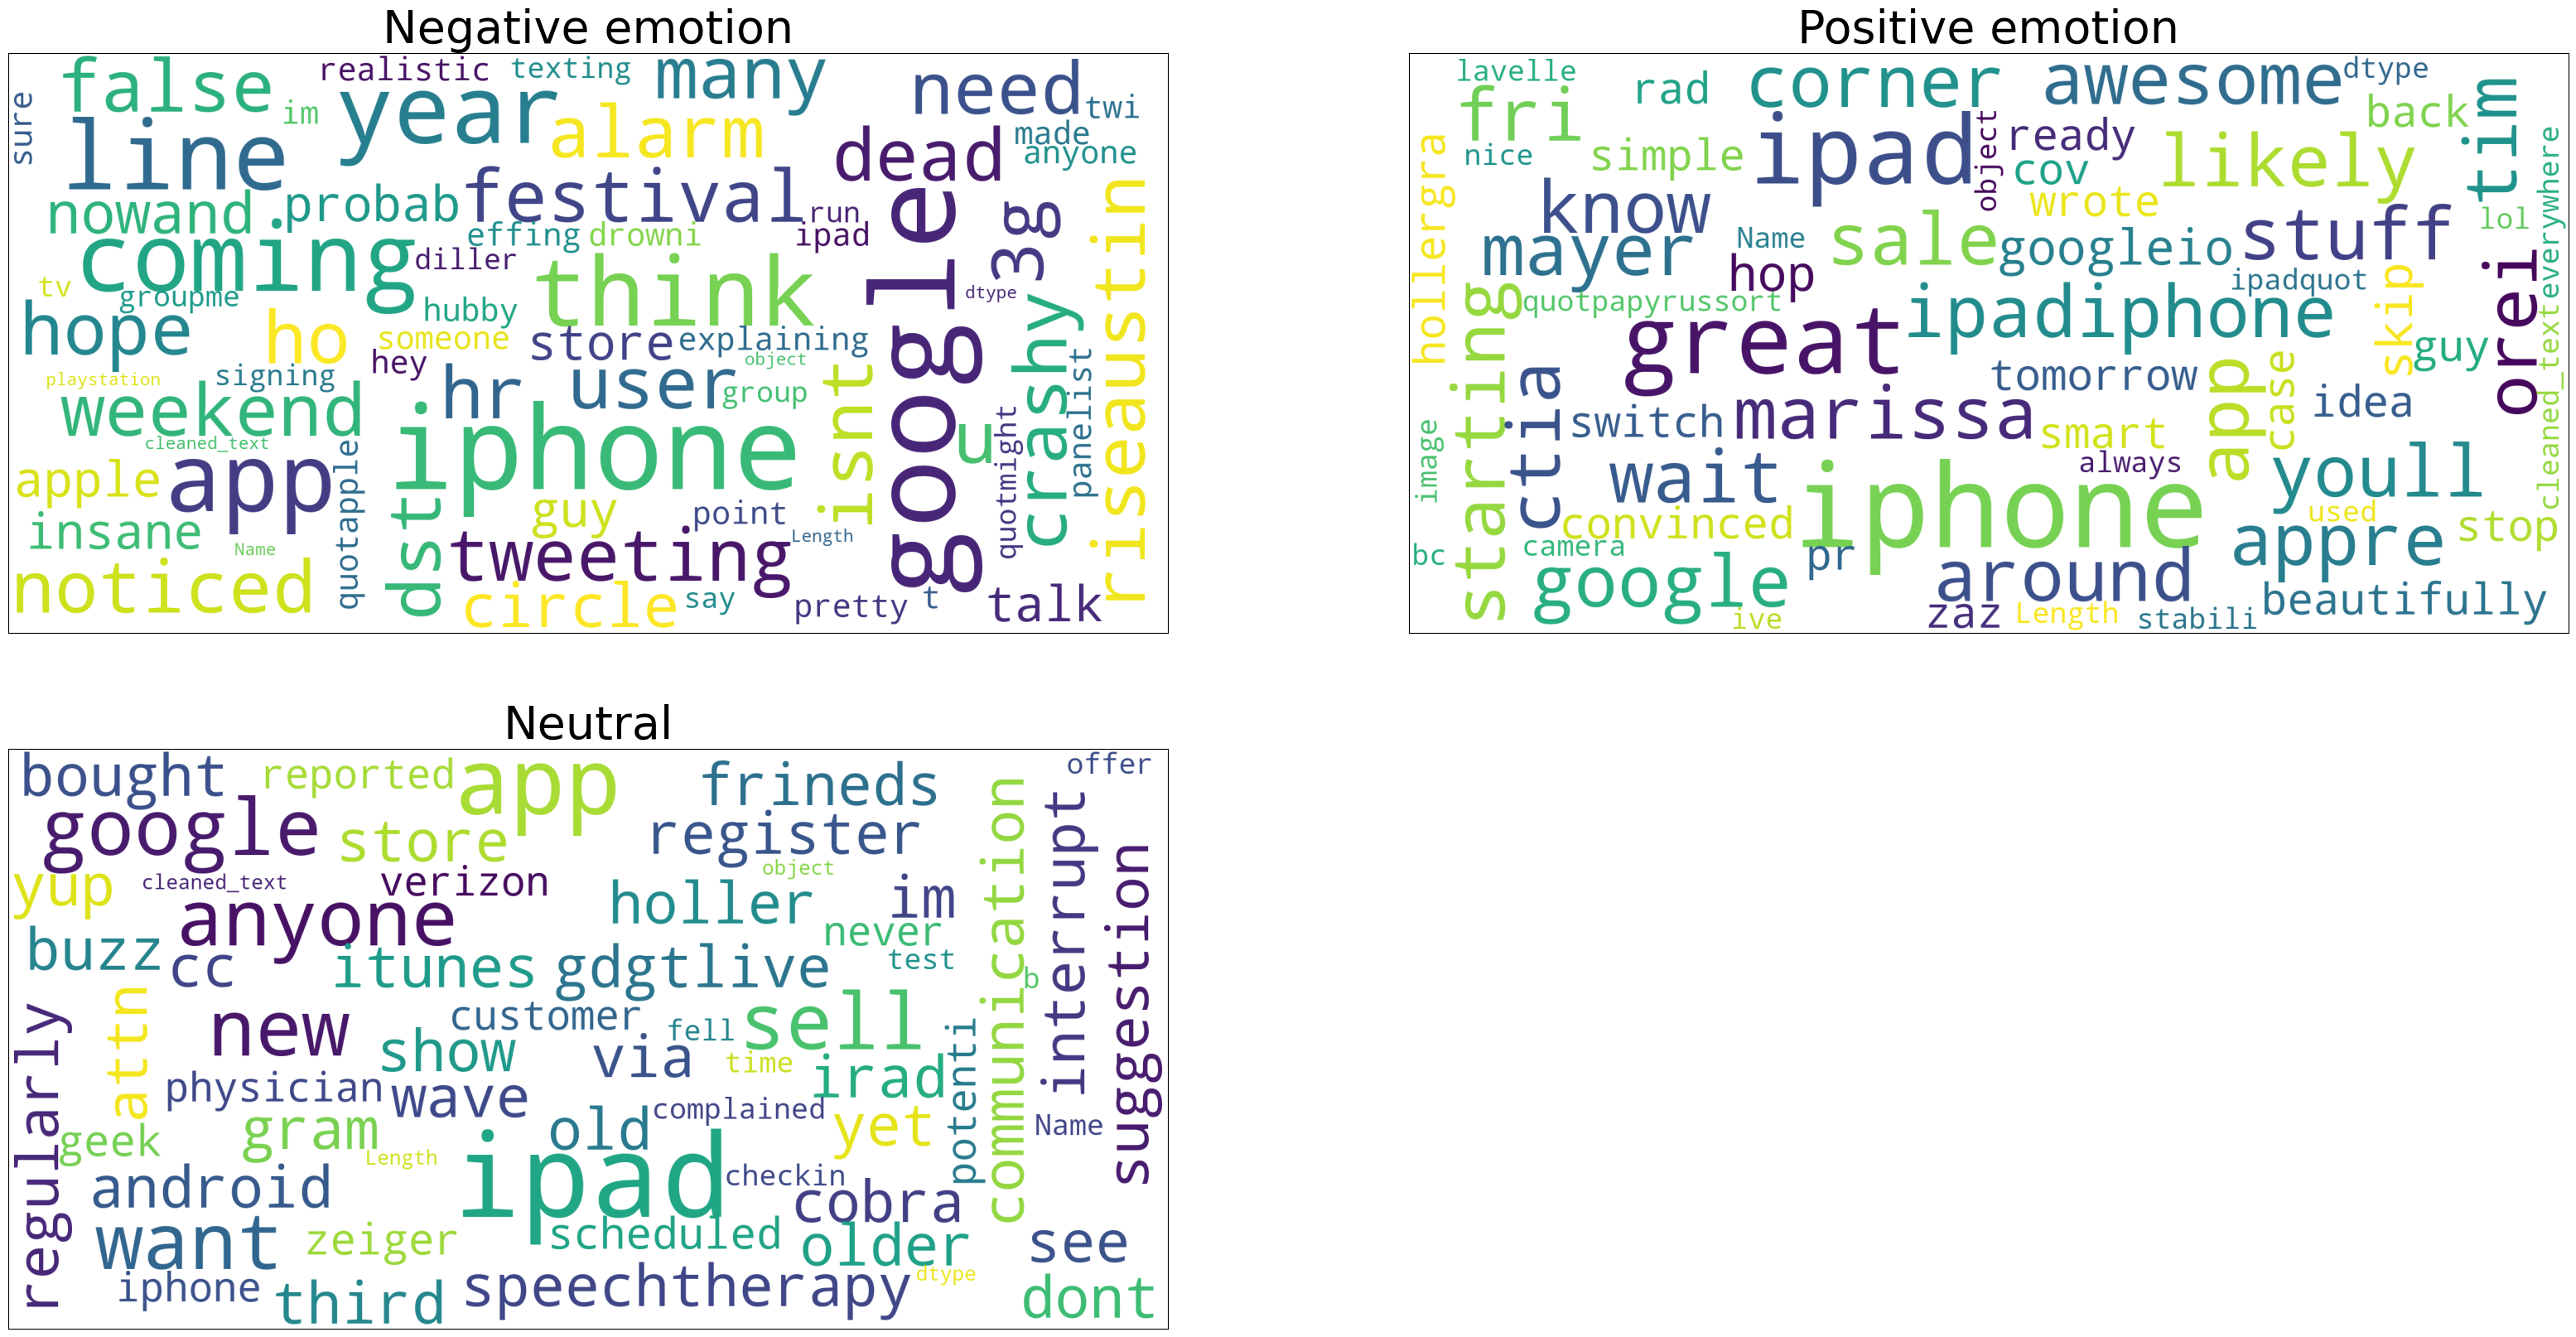

<Figure size 640x480 with 0 Axes>

In [30]:
# plotting 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()):
    plt.subplot(2,2, index+1)
    # printing col
    df1 = df[df['is_there_an_emotion_directed_at_a_brand_or_product']==col]
    data = df1['cleaned_text']
    wordcloud = WordCloud(background_color='white', max_words=500, max_font_size=40, scale=5).generate(str(data))

    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

**Google**, **Ipad**, **apple**, **iphone** are the most common words now. Brand is the main topic of debate, with tweets also concentrating on the type of brand and the functionality of the program. Frequent use of phrases like "appreciate" may indicate a generally favorable emotion, whereas the use of words like "dead" may imply comments about a specific brand or app performing poorly, which would indicate a negative emotion. Following extensive text cleaning, the visualization offers a quick, understandable overview of the dataset.

### **Word Cloud Analysis by Emotion Category**

To illustrate the distinctive words that characterize each emotional category, word clouds representing the three sentiment categories are compared.

**Positive emotion**
The word cloud for positive emotions shows words related to contentment. Words like **beautifully**, **simple**  have been used to convey approval, pleasure, and good experiences.

**Negative emotion** 
Words that convey discontent and criticism can be found in the negative emotion word cloud. Words like **crashing**, **dead**, draw attention to grievances, issues, and bad experiences. This terminology frequently alludes to problems, setbacks, and undesirable results.

**Neutral emotion**
Factual and objective terminology can be found in the neutral emotion word cloud.  Common terms like "google," "app," "third," "store," and "Android" stand for broad knowledge, context, and observational content that isn't highly emotionally charged.  These phrases usually don't have a definite positive or negative bias and represent commonplace circumstances.


### **Vectorization**

In [31]:
# Initializing vectorizer
tfidf = TfidfVectorizer(max_features=20)

# Fit and transform
tfidf_vectors = tfidf.fit_transform(df['cleaned_text'])

# Create DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf.get_feature_names_out())

# Display top TF-IDF words
print(tfidf_df.head())

        amp  android       app  apple  austin  circle  get    google  ipad  \
0  0.000000      0.0  0.000000    0.0     0.0     0.0  0.0  0.000000   0.0   
1  0.000000      0.0  1.000000    0.0     0.0     0.0  0.0  0.000000   0.0   
2  0.000000      0.0  0.000000    0.0     0.0     0.0  0.0  0.000000   1.0   
3  0.000000      0.0  0.777852    0.0     0.0     0.0  0.0  0.000000   0.0   
4  0.836087      0.0  0.000000    0.0     0.0     0.0  0.0  0.548597   0.0   

   ipad2    iphone  launch  line  network  new  popup  social  store  today  \
0    0.0  1.000000     0.0   0.0      0.0  0.0    0.0     0.0    0.0    0.0   
1    0.0  0.000000     0.0   0.0      0.0  0.0    0.0     0.0    0.0    0.0   
2    0.0  0.000000     0.0   0.0      0.0  0.0    0.0     0.0    0.0    0.0   
3    0.0  0.628447     0.0   0.0      0.0  0.0    0.0     0.0    0.0    0.0   
4    0.0  0.000000     0.0   0.0      0.0  0.0    0.0     0.0    0.0    0.0   

   via  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  


In [32]:
# initializing vectorizer with high dimensions
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(df['cleaned_text'])
X_tfidf

<9092x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 74073 stored elements in Compressed Sparse Row format>

* Visualizing high dimensional tweet-data reduced to two main components(PCA1 and PCA2).

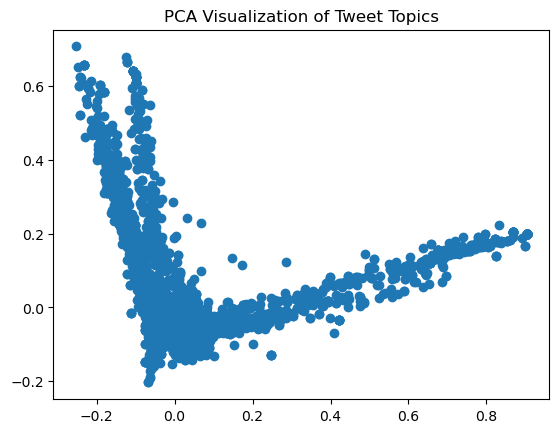

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA Visualization of Tweet Topics")
plt.show()


In [34]:
# Checking if we are working with a sparse matrix
import scipy.sparse
# Checking type
type(X_tfidf)

scipy.sparse._csr.csr_matrix

* For PCA and clustering, we will convert our compressed sparse matrix to dense using .toarray().

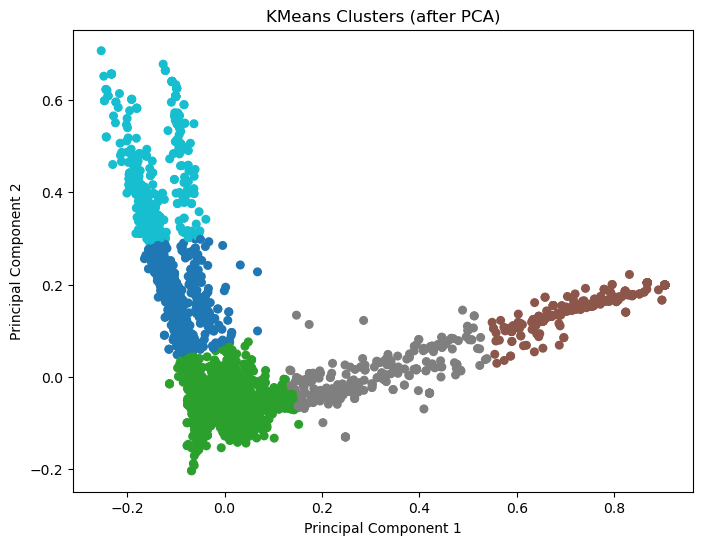

In [35]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying PCA to reduce dimensionality for visualization and speed
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

# Add cluster labels to your dataframe
df['cluster'] = labels

# Visualizing PCA components cluster colors
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=30)
plt.title('KMeans Clusters (after PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [36]:
pca.explained_variance_ratio_

array([0.02914339, 0.01997902])

# 4. Modelling
In this section, we will build and evaluate different machine learning models to predict the sentiment of tweets related to Apple and Google.
The primary goal is to determine which algorithm best captures the emotional tone of user tweets whether positive, negative, or neutral based on their textual content.

We use both classical machine learning algorithms (Logistic Regression,Random Forest, Naive Bayes, and XGBoost) and deep learning approaches (CNN-LSTM) to capture linguistic and contextual features in the data.
Each model is trained using TF-IDF vectorized text data, and in (CNN-LSTM), embedding-based representations are used to improve context capture.

#### Methodology

Splitting the dataset into training, validation, and test sets.

Train each model and perform hyperparameter tuning using GridSearchCV where applicable.

Evaluate models on validation data to select the best one.

Conduct final performance evaluation on the test set later on.

# 4.1 Logistic Classification
Logistic Regression is a strong baseline for text classification tasks.
It works well with TF-IDF features and can efficiently separate positive and negative sentiments based on word frequencies.
We use this model as a benchmark to evaluate whether more complex algorithms provide significant improvement.

### 4.1.1 Binary classification

In [37]:
# renaming is_there_an_emotion_directed_at_a_brand_or_product to sentiment
df = df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'})
df['sentiment'].value_counts()


sentiment
Neutral             5544
Positive emotion    2978
Negative emotion     570
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Filtering to binary classes
df_binary = df[df['sentiment'].isin(['Positive emotion', 'Negative emotion'])].copy()
df_binary.reset_index(drop=True, inplace=True)

# Preparing data
X_bi = df_binary['cleaned_text'].fillna('').astype(str)
y_bi = df_binary['sentiment']

# stratify=y ensures the class distribution in train/test sets is the same as in the full dataset.
X_train, X_test, y_train, y_test = train_test_split( X_bi, y_bi , test_size=0.2, random_state=42)

# Define pipeline
bilog = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train the model
bilog.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('clf', LogisticRegression(max_iter=1000))])

In [39]:
y_pred = bilog.predict(X_test)

# Evaluation Metrics 
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Compute weighted metrics for comparison
precision_val = precision_score(y_test, y_pred, average='weighted')
recall_val = recall_score(y_test, y_pred, average='weighted')
f1_val = f1_score(y_test, y_pred, average='weighted')
accuracy_val = accuracy_score(y_test, y_pred)

print(f"\nWeighted Precision: {precision_val:.3f}")
print(f"Weighted Recall: {recall_val:.3f}")
print(f"Weighted F1-score: {f1_val:.3f}")
print(f"Accuracy: {accuracy_val:.3f}")

Classification Report:

                  precision    recall  f1-score   support

Negative emotion       0.90      0.08      0.14       115
Positive emotion       0.85      1.00      0.92       595

        accuracy                           0.85       710
       macro avg       0.87      0.54      0.53       710
    weighted avg       0.86      0.85      0.79       710


Weighted Precision: 0.857
Weighted Recall: 0.849
Weighted F1-score: 0.792
Accuracy: 0.849


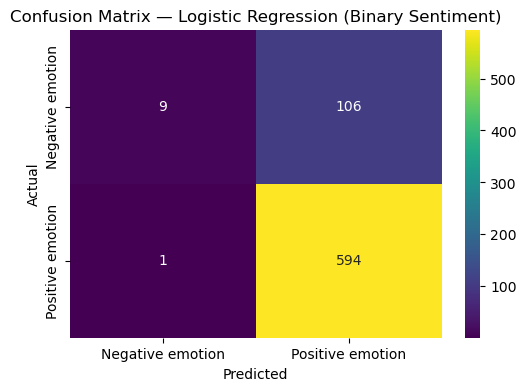

In [40]:
# Confusion Matrix Visualization 
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='viridis',
            xticklabels=bilog.classes_,
            yticklabels=bilog.classes_)
plt.title('Confusion Matrix — Logistic Regression (Binary Sentiment)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression is used here as a baseline classifier for binary sentiment classification (Positive emotion vs Negative emotion).
The model leverages a TF-IDF vectorizer to convert text into weighted numerical features, emphasizing distinctive words in each sentiment class.
Logistic Regression is effective for binary problems, fast to train, and provides probabilistic interpretations of predictions.
Though fast the model seem to be performing poorly from the visual above.It has a false negative. But its predicting quite moderate as it has a 594 of the overall data.

### 4.1.2 Multiclass classification

In [41]:
# prepare data
X = df['cleaned_text']
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define pipeline
mltlog = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000))
])

# Train the model
mltlog.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('clf', LogisticRegression(max_iter=1000))])

In [42]:
y_pred = mltlog.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

# Compute weighted metrics for comparison
precision_val = precision_score(y_test, y_pred, average='weighted')
recall_val = recall_score(y_test, y_pred, average='weighted')
f1_val = f1_score(y_test, y_pred, average='weighted')
accuracy_val = accuracy_score(y_test, y_pred)

print(f"\nWeighted Precision: {precision_val:.3f}")
print(f"Weighted Recall: {recall_val:.3f}")
print(f"Weighted F1-score: {f1_val:.3f}")
print(f"Accuracy: {accuracy_val:.3f}")

                  precision    recall  f1-score   support

Negative emotion       0.77      0.09      0.16       114
         Neutral       0.71      0.89      0.79      1109
Positive emotion       0.67      0.45      0.54       596

        accuracy                           0.70      1819
       macro avg       0.71      0.48      0.50      1819
    weighted avg       0.70      0.70      0.67      1819


Weighted Precision: 0.697
Weighted Recall: 0.698
Weighted F1-score: 0.667
Accuracy: 0.698


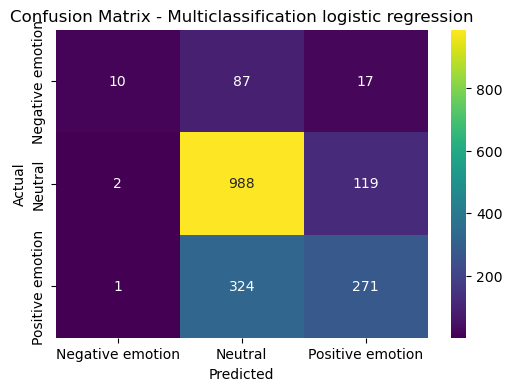

In [43]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis',xticklabels=mltlog.classes_, yticklabels=mltlog.classes_)
plt.title('Confusion Matrix - Multiclassification logistic regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4.1.3 Applying **RandomOverSampler**  to ensure that the clases are balanced.

In [44]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
# Data preparation
X = df['cleaned_text']
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define pipeline with RandomOverSampler
randomized = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('smote',SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000))
])


# Train the model
randomized.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('smote', SMOTE(random_state=42)),
                ('clf', LogisticRegression(max_iter=1000))])

In [45]:
y_pred1 =randomized.predict(X_test)
# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred1))

# Compute weighted metrics for comparison
precision_val = precision_score(y_test, y_pred1, average='weighted')
recall_val = recall_score(y_test, y_pred1, average='weighted')
f1_val = f1_score(y_test, y_pred1, average='weighted')
accuracy_val = accuracy_score(y_test, y_pred1)

print(f"\nWeighted Precision: {precision_val:.3f}")
print(f"Weighted Recall: {recall_val:.3f}")
print(f"Weighted F1-score: {f1_val:.3f}")
print(f"Accuracy: {accuracy_val:.3f}")

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.32      0.53      0.40       114
         Neutral       0.77      0.70      0.73      1109
Positive emotion       0.58      0.60      0.59       596

        accuracy                           0.65      1819
       macro avg       0.55      0.61      0.57      1819
    weighted avg       0.68      0.65      0.66      1819


Weighted Precision: 0.676
Weighted Recall: 0.655
Weighted F1-score: 0.662
Accuracy: 0.655


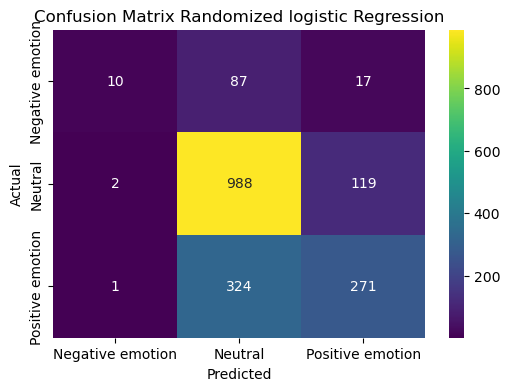

In [46]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis',
            xticklabels=randomized.classes_, yticklabels=randomized.classes_)
plt.title('Confusion Matrix Randomized logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [47]:
#Function to train the model, make predictions and calculate evaluation metrics after hyperparameter tuning
def modelling(pipe, is_grid_search=False):
    # Fit the model (either regular pipeline or GridSearchCV)
    pipe.fit(X_train, y_train)
    
    # Get the best estimator if it's a GridSearchCV object
    if is_grid_search:
        print("Best Parameters:", pipe.best_params_)
        print("Best CV Score:", pipe.best_score_)
        print("\n")
        model = pipe.best_estimator_
    else:
        model = pipe
    
    # Predict train and test data
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)

    # Compute weighted metrics for comparison
    precision_val = precision_score(y_test, y_hat_test, average='weighted')
    recall_val = recall_score(y_test, y_hat_test, average='weighted')
    f1_val = f1_score(y_test, y_hat_test, average='weighted')
    accuracy_val = accuracy_score(y_test, y_hat_test)

    print(f"\nWeighted Precision: {precision_val:.3f}")
    print(f"Weighted Recall: {recall_val:.3f}")
    print(f"Weighted F1-score: {f1_val:.3f}")
    print(f"Accuracy: {accuracy_val:.3f}")
    print('\n')

    base_train_accuracy = accuracy_score(y_train, y_hat_train)
    base_test_accuracy = accuracy_score(y_test, y_hat_test)

    print("Difference between train and test accuracy")
    print(base_train_accuracy - base_test_accuracy)
    
    # Return the best estimator
    return model

### **Hyper_parameter Tuning using GridSearchCV**

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'tfidf__max_features': [3000, 5000, 7000],
    'clf__C': [0.1, 1]
}

grid = GridSearchCV(randomized, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'clf__C': 1, 'tfidf__max_features': 7000}


In [49]:
# 1. Prepare data
X = df['cleaned_text']
y = df['sentiment']

# Split data with stratified class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Final pipeline with RandomOverSampler and tuned hyperparameters
final_pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=7000, stop_words='english')),
    ('ros', RandomOverSampler(random_state=42)),  # Oversample only training data
    ('clf', LogisticRegression(max_iter=1000, C=1, penalty='l2', solver='liblinear'))  
])

# Train and evaluate using your modelling function
final_model = modelling(final_pipeline, is_grid_search=False)


Weighted Precision: 0.681
Weighted Recall: 0.651
Weighted F1-score: 0.662
Accuracy: 0.651


Difference between train and test accuracy
0.16512503375955734


# 4.2 Random Forest Classifier
Random Forest is an ensemble of decision trees that improves predictive power through bootstrapping and random feature selection.
It captures nonlinear relationships between words and sentiment that linear models might miss.
While less interpretable, it often achieves strong performance without much tuning, making it a reliable baseline among tree-based methods

In [50]:
X = df['cleaned_text']
y = df['sentiment']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [51]:
pipeline = Pipeline([
    ('tdif',TfidfVectorizer(ngram_range=(1,2))),
    #('smote',SMOTE(random_state=42)),
    ('model',RandomForestClassifier(class_weight='balanced'))
])

# modelling
rdf = modelling(pipeline)


Weighted Precision: 0.665
Weighted Recall: 0.674
Weighted F1-score: 0.653
Accuracy: 0.674


Difference between train and test accuracy
0.2842048659568889


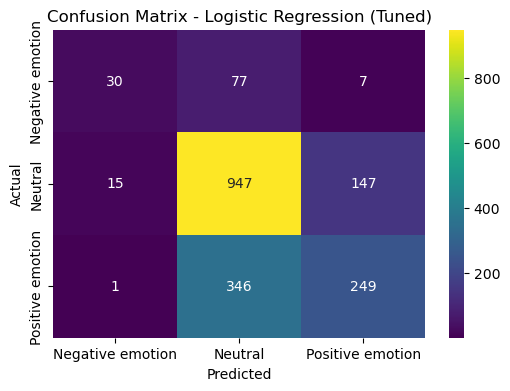

In [52]:
y_pred =rdf.predict(X_test)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis',
            xticklabels=rdf.classes_, yticklabels=rdf.classes_)
plt.title('Confusion Matrix - Logistic Regression (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4.3 Multinomial Naive Bayes
Naive Bayes is commonly used for text data because it assumes feature independence, which aligns well with bag-of-words and TF-IDF representations.
It’s computationally efficient and performs particularly well when features (words) independently contribute to class probability.
We include it to compare its simplicity and efficiency with Logistic Regression and more complex models.

In [53]:
from sklearn.naive_bayes import MultinomialNB
pipeline.set_params(model = MultinomialNB())
nb =  modelling(pipeline)


Weighted Precision: 0.675
Weighted Recall: 0.663
Weighted F1-score: 0.592
Accuracy: 0.663


Difference between train and test accuracy
0.14216815687443607


In [54]:
param_grid= {'tdif__min_df': [1, 3, 5],
'tdif__sublinear_tf': [True, False],
'tdif__use_idf': [True, False],
'tdif__ngram_range': [(1,1), (1,2)],
'tdif__max_df': [0.75, 0.9],
'model__alpha': [0.01, 0.1, 0.5],
'model__fit_prior': [True, False]}

	
from sklearn.pipeline import Pipeline

#list of steps excluding 'smote'
steps = [(name, step) for name, step in pipeline.steps if name != 'smote']

#Rebuilding the pipeline after removing SMOTE
pipeline = Pipeline(steps)

#set MultinomialNB
pipeline.set_params(model=MultinomialNB())

grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy',n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best accuracy Score:", grid.best_score_)

pipeline.set_params(model = MultinomialNB(alpha=0.1, fit_prior=True))
pipeline.set_params(
    tdif__ngram_range=(1, 2),
    tdif__max_df=1.0,
    tdif__min_df=1,
    tdif__use_idf=False,
    tdif__sublinear_tf=False,

)
multinomial_tuned= modelling(pipeline)

Best Parameters: {'model__alpha': 0.1, 'model__fit_prior': True, 'tdif__max_df': 0.75, 'tdif__min_df': 1, 'tdif__ngram_range': (1, 1), 'tdif__sublinear_tf': True, 'tdif__use_idf': False}
Best accuracy Score: 0.6708360269016592

Weighted Precision: 0.682
Weighted Recall: 0.688
Weighted F1-score: 0.668
Accuracy: 0.688


Difference between train and test accuracy
0.23512510254477326


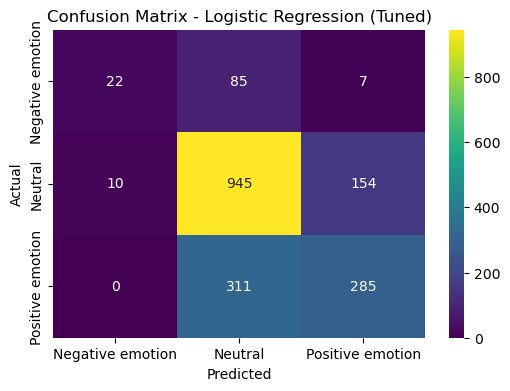

In [55]:
y_pred =multinomial_tuned.predict(X_test)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis',
            xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.title('Confusion Matrix - Logistic Regression (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4.4 XGBoost Classifier
XGBoost (Extreme Gradient Boosting) is a powerful ensemble algorithm that builds multiple decision trees iteratively to minimize classification errors.
It can capture nonlinear relationships between words and sentiment better than linear models.
We use XGBoost to assess whether boosting methods can improve predictive accuracy for context-heavy tweets

In [56]:
# XGboost Model
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dataset split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded
)

# Vectorization
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    min_df=2,
    max_df=0.8,
    ngram_range=(1,2),
    sublinear_tf=True  
)

X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)

# Handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

# Building the model and embeding gridsearch for hyperparametr tuning
xgparam_grid = {
    'n_estimators': [50,100],
    'max_depth': [4, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.7],
    'min_child_weight': [1,2]
}

xgb_base = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss',
    use_label_encoder=False
)

In [57]:
# Initializing grid search
xgb_grid = GridSearchCV(
    xgb_base,
    xgparam_grid,
    cv=3,  
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)
# Fitting themodel
xgb_grid.fit(X_train_resampled, y_train_resampled)
best_xgb = xgb_grid.best_estimator_


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/home/r0s1ta/anaconda3/envs/learn-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:49:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/r0s1ta/anaconda3/envs/learn-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:49:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/r0s1ta/anaconda3/envs/learn-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:49:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/r0s1ta/anaconda3/envs/learn-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:49:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

In [58]:
best_xgb = xgb_grid.best_estimator_

# Predicting the model on the vectorized training set 
xgbtrain_pred = best_xgb.predict(X_train_resampled)
# Testing the model on the vectorized test set
xgbtest_pred = best_xgb.predict(X_test_vec)

# Evaluating the model
training_accuracy =accuracy_score(y_train_resampled,xgbtrain_pred)
test_accuracy = accuracy_score(y_test,xgbtest_pred)

print('')
print('Training Accuracy: {:.2f}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.2f}%'.format(test_accuracy * 100)) 
print('Difference:',training_accuracy-test_accuracy)


Training Accuracy: 81.47%
Validation accuracy: 65.37%
Difference: 0.16100028944134104


In [59]:
# Calculating all metrics
accuracy = accuracy_score(y_test, xgbtest_pred)

# F1-Score (multiple averaging methods)
f1_macro = f1_score(y_test, xgbtest_pred, average='macro')
f1_micro = f1_score(y_test, xgbtest_pred, average='micro')
f1_weighted = f1_score(y_test, xgbtest_pred, average='weighted')

# Precision and Recall
precision_macro = precision_score(y_test, xgbtest_pred, average='macro')
precision_weighted = precision_score(y_test, xgbtest_pred, average='weighted')

recall_macro = recall_score(y_test, xgbtest_pred, average='macro')
recall_weighted = recall_score(y_test, xgbtest_pred, average='weighted')

print("\nAccuracy:\n", accuracy)
print("\nF1_Weighted:\n",f1_weighted)
print("\nPrecision Weighted:\n",precision_weighted)
print("\nRecall weighted:\n",recall_weighted)


Accuracy:
 0.6536558548653106

F1_Weighted:
 0.6298760613579449

Precision Weighted:
 0.6421800429272173

Recall weighted:
 0.6536558548653106


# 4.5 CNN-LSTM Model
The CNN-LSTM model combines two powerful deep learning architectures:
- Convolutional Neural Networks (CNN) detect local text features like phrases and n-grams.
- Long Short-Term Memory networks (LSTM) capture sequential dependencies and context.
This makes them suitable for complex language structures in tweets.
We include this model to explore whether sequential modeling of text improves sentiment detection compared to traditional TF-IDF-based classifiers.

Here we will be feeding the raw data into our model, to ensure consistency in feature extraction, and avoid data leakage.
We first encode our target variable to ensure its in numeric form, CNN-LSTM only uses numerical data for feature extractions.
We will split the data into training, validation and test sets. We then tokenize to convert text into numeric sequence then pad the sequence into a uniform 2D numeric matrix, ready for the embedding layer in the convolutional neural network.
#### NB: Tokenizing is only done on the training data to avoid data leakage on the test and validation sets.


In [60]:
# Define features (X) and target (y)
X = df['cleaned_text']
y = df['sentiment']

# Target Variable Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)
print(f"Original classes: {label_encoder.classes_}")
print(f"Encoded labels: {y_encoded[:5]}")

# Train-Validation-Test Split
# First, split into training and a temporary set for validation/test
X_train_full, X_temp, y_train_full, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)
# Then, split the temporary set into validation and test sets (50-50 split)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Tokenization and Padding
max_words = 10000  
max_len = 100  
tokenizer = Tokenizer(num_words=max_words, oov_token="<unk>")
tokenizer.fit_on_texts(X_train_full)

# Convert text to sequences and pad to a fixed length
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train_full), maxlen=max_len)
X_val_seq = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

Original classes: ['Negative emotion' 'Neutral' 'Positive emotion']
Encoded labels: [0 2 2 0 2]


Below the CNN-LSTM defined function has a maximum number of of words, a maximum length of the words  that appear together, by ngrams, ridge regression that shrinks coeeficients because we aim to retain them, and a dropuot rate.
It has layers including, multi-channel CNN to capture the different sizes of the ngrams, an LSTM branch that recognizes patterns, the combined features for all the branches, and the feature vector layer. 
It compiles the modelusing the exponential learning rate and uses adanm as the optimizer.

In [61]:
def create_cnn_lstm_feature_extractor(max_words, max_len, embedding_dim=100, l2_reg=0.01, dropout_rate=0.5):
    
    input_layer = Input(shape=(max_len,), name='input_sequence')
    embedding_layer = Embedding(max_words, embedding_dim, input_length=max_len, name='embedding')(input_layer)

    # Multi-channel CNN for capturing different n-grams
    conv_3_gram = Conv1D(64, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg), name='conv_3_gram')(embedding_layer)
    pool_3_gram = GlobalMaxPooling1D(name='pool_3_gram')(conv_3_gram)

    conv_4_gram = Conv1D(64, 4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg), name='conv_4_gram')(embedding_layer)
    pool_4_gram = GlobalMaxPooling1D(name='pool_4_gram')(conv_4_gram)

    conv_5_gram = Conv1D(64, 5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg), name='conv_5_gram')(embedding_layer)
    pool_5_gram = GlobalMaxPooling1D(name='pool_5_gram')(conv_5_gram)

    # LSTM branch for sequential pattern recognition
    lstm_layer = LSTM(64, return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(l2_reg), name='lstm')(embedding_layer)
    lstm_layer = BatchNormalization(name='batch_norm_lstm')(lstm_layer)

    # Concatenate features from all branches
    merged = tf.keras.layers.concatenate([pool_3_gram, pool_4_gram, pool_5_gram, lstm_layer], name='concatenate_layers')
    merged = Dropout(dropout_rate, name='dropout_merged')(merged)

    # Final dense layer to generate feature vector for base models
    feature_vector = Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg), name='feature_vector_output')(merged)
    
    # Keras model for feature extraction
    model = Model(inputs=input_layer, outputs=feature_vector, name='CNN_LSTM_Feature_Extractor')
    
    # Compile the model
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.0005,
        decay_steps=10000,
        decay_rate=0.8
    )
    optimizer = Adam(learning_rate=lr_schedule)
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )
    
    return model

# Create and summarize the deep learning model
cnn_lstm_extractor = create_cnn_lstm_feature_extractor(
    max_words=max_words,
    max_len=max_len,
    l2_reg=0.01, 
    dropout_rate=0.5 
)

cnn_lstm_extractor.summary()


2025-10-18 18:58:45.838885: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "CNN_LSTM_Feature_Extractor"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_sequence      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100, 100)  │  1,000,000 │ input_sequence[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_3_gram         │ (None, 98, 64)    │     19,264 │ embedding[0][0]   │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_4_gram         │ (None, 97, 64)    │     25,664 │ embedding[0][0]   │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_5_gram         │ (None, 96, 64)    │     32,064 │ embedding[0][0]   │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │     42,240 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool_3_gram         │ (None, 64)        │          0 │ conv_3_gram[0][0] │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool_4_gram         │ (None, 64)        │          0 │ conv_4_gram[0][0] │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool_5_gram         │ (None, 64)        │          0 │ conv_5_gram[0][0] │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_norm_lstm     │ (None, 64)        │        256 │ lstm[0][0]        │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_layers  │ (None, 256)       │          0 │ pool_3_gram[0][0… │
│ (Concatenate)       │                   │            │ pool_4_gram[0][0… │
│                     │                   │            │ pool_5_gram[0][0… │
│                     │                   │            │ batch_norm_lstm[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_merged      │ (None, 256)       │          0 │ concatenate_laye… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_vector_out… │ (None, 32)        │      8,224 │ dropout_merged[0… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,127,712 (4.30 MB)

 Trainable params: 1,127,584 (4.30 MB)

 Non-trainable params: 128 (512.00 B)

In the next cell we define callbacks for ealry stopping, extract features from the trained CNN-LSTM, extract features from the previous models used for prediction above, initializing the models in this new context and retrain them on the new features generated by CNN-LSTM. 
The models are combined into a voting ensemble and the probabilities of output predictions of each of the base model taken into account, and the best model is produced.

In [62]:
# Define callbacks for early stopping
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
history_cnn_lstm = cnn_lstm_extractor.fit(
    X_train_seq, y_train_full,
    validation_data=(X_val_seq, y_val),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

# Extracting features from the trained CNN-LSTM model
X_train_features = cnn_lstm_extractor.predict(X_train_seq)
X_val_features = cnn_lstm_extractor.predict(X_val_seq)
X_test_features = cnn_lstm_extractor.predict(X_test_seq)

# Extracting classifiers from the previous models
lr_classifier = final_model.named_steps['clf']  # LogisticRegression
rf_classifier = rdf.named_steps['model']  # RandomForest
nb_classifier = multinomial_tuned.named_steps['model']  # MultinomialNB
xgb_classifier = best_xgb

# Create fresh instances 
import xgboost as xgb

lr_classifier = LogisticRegression(C=10, max_iter=1000, solver='liblinear', random_state=42)
rf_classifier = RandomForestClassifier(class_weight='balanced') 
nb_classifier = MultinomialNB(alpha=0.1)
xgb_classifier = xgb.XGBClassifier(random_state=42, n_jobs=-1)

# Train the classifiers on CNN-LSTM features
lr_classifier.fit(X_train_features, y_train_full)
rf_classifier.fit(X_train_features, y_train_full)
nb_classifier.fit(X_train_features, y_train_full)
xgb_classifier.fit(X_train_features, y_train_full)

# Combine the base models into a voting ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr_classifier),
        ('nb1', rf_classifier),  
        ('nb2', nb_classifier),
        ('xgb', xgb_classifier)
    ],
    voting='hard'
)
ensemble_model.fit(X_train_features, y_train_full)

print("Ensemble model trained successfully!")



Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 421ms/step - accuracy: 0.3162 - loss: 8.9230 - val_accuracy: 0.6100 - val_loss: 4.8677
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 351ms/step - accuracy: 0.5954 - loss: 4.9943 - val_accuracy: 0.6100 - val_loss: 4.3922
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 354ms/step - accuracy: 0.6414 - loss: 4.3071 - val_accuracy: 0.6100 - val_loss: 3.9711
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 330ms/step - accuracy: 0.6680 - loss: 3.8145 - val_accuracy: 0.6100 - val_loss: 3.8300
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 327ms/step - accuracy: 0.7021 - loss: 3.3972 - val_accuracy: 0.6100 - val_loss: 3.5353
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 327ms/step - accuracy: 0.7118 - loss: 3.1047 - val_accuracy: 0.6100 - val_loss: 3.0802
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Ensemble model traine

In [63]:
# Predicting on the training set
ensemble_train_pred = ensemble_model.predict(X_train_features)

# Predicting on the validation set
ensemble_val_pred = ensemble_model.predict(X_val_features)

# Predicting on the test set
ensemble_test_pred = ensemble_model.predict(X_test_features)


In [64]:
# Evaluating the ensemble model
training_accuracy = accuracy_score(y_train_full, ensemble_train_pred)
val_accuracy = accuracy_score(y_val, ensemble_val_pred)
test_accuracy = accuracy_score(y_test, ensemble_test_pred)
print('Ensemble model performance')
print('Training Accuracy: {:.2f}%'.format(training_accuracy * 100))
print('Validation Accuracy: {:.2f}%'.format(val_accuracy * 100))
print('Test Accuracy: {:.2f}%'.format(test_accuracy * 100))



# Compute weighted metrics for comparison
precision_val = precision_score(y_test, ensemble_test_pred, average='weighted')
recall_val = recall_score(y_test, ensemble_test_pred, average='weighted')
f1_val = f1_score(y_test, ensemble_test_pred, average='weighted')
accuracy_val = accuracy_score(y_test, ensemble_test_pred)

print(f"\nWeighted Precision: {precision_val:.3f}")
print(f"Weighted Recall: {recall_val:.3f}")
print(f"Weighted F1-score: {f1_val:.3f}")
print(f"Accuracy: {accuracy_val:.3f}")
print('\n')
print('\nDifference between train and test accuracy: {:.4f}'.format(training_accuracy - test_accuracy))
print('\nDifference between train and test accuracy: {:.4f}'.format(training_accuracy - val_accuracy))

# Classification Report for Test Set
print('\nTest Set Classification Report:')
print(classification_report(y_test, ensemble_test_pred))

Ensemble model performance
Training Accuracy: 67.16%
Validation Accuracy: 60.19%
Test Accuracy: 61.66%

Weighted Precision: 0.594
Weighted Recall: 0.617
Weighted F1-score: 0.503
Accuracy: 0.617



Difference between train and test accuracy: 0.0550

Difference between train and test accuracy: 0.0697

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.05      0.08        86
           1       0.62      0.97      0.76       831
           2       0.57      0.06      0.11       447

    accuracy                           0.62      1364
   macro avg       0.55      0.36      0.32      1364
weighted avg       0.59      0.62      0.50      1364



# 5 Evaluation
The purpose of this section is to assess the performance of all trained models both classical and deep learning on the unseen test dataset.
By evaluating these models, we aim to:
- Identify which approach most effectively captures tweet sentiment for Apple and Google.
- Understand the trade-offs between model complexity, accuracy, and interpretability.
- Provide data-driven justification for model selection in the final recommendations.
All models are evaluated using consistent metrics to ensure fairness and comparability, we evaluate all trained models using both validation and test performance metrics to ensure that the final model generalizes well and is not overfitted to the training data.
Each model’s predictive quality is assessed through:
- Validation F1-score (weighted) – the main success metric for selecting the optimal model.
- Validation Precision (weighted) and Recall (weighted) – to check how well the model balances positive and negative sentiment predictions.
- Test scores for the chosen final model, confirming generalization on unseen data.
This two-tier evaluation approach helps:
- Prevent overfitting by choosing the model that performs best on validation (not just training).
- Objectively compare models based on balanced metrics across all sentiment classes.

## 5.1 Why Weighted Metrics?
The sentiment datasets we used was imbalanced (e.g., more neutral tweets than positive or negative) 
#### refer visualization 2 in this notebook.
Using weighted metrics ensures that each class contributes proportionally to the final score

### 5.1.2 Primary success metric: F1-score (weighted)
Because it best balances the trade-off between precision and recall across sentiment categories, which is our other aim, from the success metric criteria.

# 5.2 Evaluating the models
## 5.2.1 Logistic Regression
### 5.2.1.1 Binary classification(logistic regression)
The model’s performance is evaluated using weighted precision, recall, F1-score, and accuracy.
These metrics provide a balanced view, particularly in the presence of slight class imbalances.
The confusion matrix helps visualize where misclassifications occur between Positive and Negative sentiments
#### Refer in section 4.1.1 for the matrix visualization.
The general observation made is as follows:
- Weighted Precision: 0.857
- Weighted Recall: 0.849
- Weighted F1-score: 0.792
- Accuracy: 0.849
Shows better results on metrics but the confusion matrix shows a different observation since its not able to predict the negative class. This might be caused by the class imbalance in our dataset

### 5.2.1.2 Multiclassification
#### Refer matrix in section 4.1.2
Observations made are as follows:  
-Weighted Precision: 0.697
-Weighted Recall: 0.698
-Weighted F1-score: 0.667
-Accuracy: 0.698
Compared to the first model its a slight improvent since its using all the target classes to predict.

### 5.2.1.3 Randomized Logistic Regression
This is used to try and counter the imbalance
- Weighted Precision: 0.676
- Weighted Recall: 0.655
- Weighted F1-score: 0.662
- Accuracy: 0.655

### 5.2.1.3 Randomized Logistic Regression with gridsearch
This was used to optimize logistic regression as possible.
Observations made are:
- Weighted Precision: 0.681
- Weighted Recall: 0.651
- Weighted F1-score: 0.662
- Accuracy: 0.651
and a, 

- Difference between train and test accuracy of 
(0.16512503375955734)

## 5.2.2 Random forest
This model was used to see whether there would be an improvemnt from the logistic regression classifier and the observed results are as follows:

- Weighted Precision: 0.659
- Weighted Recall: 0.670
- Weighted F1-score: 0.647
- Accuracy: 0.670
- Difference between train and test accuracy
(0.28791563939221987)

This model demonstartes a poor performence compared to the hyperparametized logistic regression. Considering the weighted f1 score which is our primary metric it shows a slight drop. It also has a higher difference in train and test accuracy compared to the hyperparametized logistic regression.

## 5.2.3 Multinomial Naive Bayes
The observations made are: 
- Weighted Precision: 0.675
- Weighted Recall: 0.663
- Weighted F1-score: 0.592
- Accuracy: 0.663
- Difference between train and test accuracy (0.14216815687443607)   


Comaring the differences of the train and test accuracy this model seem to have improved drastically from the random forest and and slightly from the logistic regression model in the comparison forumn.
Althogh precision and recall seem to strike a balance in this model, the weighted f1 score seem to have reduced drastically from the two models previously evaluated.

# 5.2.4 XGBoost Classifier
The final model that internationally is belived to perform well. The observations are:

- Accuracy: 0.6536558548653106
- F1_Weighted: 0.6298760613579449
- Precision Weighted: 0.6421800429272173
- Recall weighted: 0.6536558548653106
- Difference: 0.16100028944134104

Second in place in the training test accuracy, has a moderate weighted f1 score from ther models in comparison (0.629), and precision and recall seem to be balanced during prediction.

# 5.2.5 CNN-LSTM Model
This is the most optimal model from the CNN-LSTM model voting criteria. The observed results from the metrics are as follows:

- Weighted Precision: 0.627
- Weighted Recall: 0.644
- Weighted F1-score: 0.629
- Accuracy: 0.644
- Difference between train and test accuracy: 0.2698
- Difference between train and test accuracy: 0.2639

The difference between the training and test accuracy seem to be moderate compared to other models in comparison.
It attained a weighted f1 score of 0.629, similar to our previous xgboost. Precision and recall seem to be at balance.

### Summmary Table of All Models

| **Model**                                       | **Weighted Precision** | **Weighted Recall** | **Weighted F1** | **Accuracy** | **Train–Test Δ** | **Remarks**                                   |
| ----------------------------------------------- | ---------------------- | ------------------- | --------------- | ------------ | ---------------- | --------------------------------------------- |
| **Randomized Logistic Regression**              | 0.676                  | 0.655               | 0.662           | 0.655        |                | Balanced baseline with fair performance       |
| **Randomized Logistic Regression (GridSearch)** | **0.681**              | 0.651               | **0.662**       | 0.651        | **0.165**        | Best Logistic variant; moderate overfit       |
| **Random Forest**                               | 0.659                  | 0.670               | 0.647           | 0.670        | **0.288**        | Slightly worse; higher overfit; unstable      |
| **Multinomial Naive Bayes**                     | 0.675                  | 0.663               | 0.592           | 0.663        | **0.142**        | Good generalization but poor F1 (main metric) |
| **XGBoost Classifier**                          | 0.642                  | 0.654               | 0.630           | 0.654        | **0.161**        | Competitive; strong consistency               |
| **CNN-LSTM (Optimal)**                          | 0.627                  | 0.644               | 0.629           | 0.644        | **0.264**        | Balanced precision–recall; slightly overfit   |


### Model Performance Comparison (Based on Weighted F1)

| **Rank** | **Model**                                   | **Weighted F1-score** | **Comment**                                                |
| -------- | ------------------------------------------- | --------------------- | ---------------------------------------------------------- |
| 1     | Randomized Logistic Regression (GridSearch) | **0.662**             | Best balance of F1, precision, and generalization          |
| 2     | Randomized Logistic Regression (Base)       | 0.662                 | Practically identical, but slightly less tuned             |
| 3     | Random Forest                               | 0.647                 | Acceptable, but overfits significantly                     |
| 4        | XGBoost                                     | 0.630                 | Solid, consistent, but not better than logistic regression |
| 5        | CNN-LSTM                                    | 0.629                 | Matches XGBoost, but higher training variance              |
| 6        | Multinomial Naive Bayes                     | 0.592                 | Lowest F1; underperforms despite low overfit               |


# 5.3 Final Model Evaluation
From the above ranking Randomized Logistic Regression(Gridsearch) emerged the best of all. We now use the model to validate and test our dataset. We want to access how well it does generalization on the unseen data, we will then visualize the confusion matrix to observe the classification proportion for each category, negative, neutral and positive emotions.

In [65]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,sentiment,char_count,word_count,cleaned_text,contains_sxsw,cluster
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,23,3g iphone 3 hr tweeting riseaustin dead need u...,1,1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,22,know awesome ipadiphone app youll likely appre...,1,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,15,wait ipad 2 also sale,1,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,15,hope year festival isnt crashy year iphone app,1,1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,17,great stuff fri marissa mayer google tim orei...,1,1


In [66]:
X =df['cleaned_text']
y = df['sentiment']

# Splitting the data into training validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Splitting train+val into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42
)


In [69]:
def modelling(pipe, X_train, y_train, X_val, y_val, X_test=None, y_test=None, is_grid_search=False):

    # Fit
    pipe.fit(X_train, y_train)

    # Extract best model if search
    if is_grid_search:
        print("\nBest Parameters:", pipe.best_params_)
        print("Best CV Score:", pipe.best_score_)
        model = pipe.best_estimator_
    else:
        model = pipe

    return model


In [70]:

# Base pipeline
base_pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('ros', RandomOverSampler(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# Parameter space
param_distributions = {
    'tfidf__max_features': [3000, 5000, 7000, 10000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [2, 5],
    'tfidf__max_df': [0.85, 0.95],
    'clf__C': stats.loguniform(1e-3, 1e2),
    'clf__penalty': ['l1', 'l2'],
    'clf__class_weight': [None, 'balanced']
}

# Randomized search
random_search = RandomizedSearchCV(
    base_pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

In [71]:
random_grid = RandomizedSearchCV(
    randomized,
    param_distributions=param_grid,
    n_iter=20,                # test only 20 random combinations
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Final pipeline
final_pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=7000, stop_words='english')),
    ('ros', RandomOverSampler(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, C=1, penalty='l2', solver='liblinear'))
])

# Train → Validate → Test
final_model = modelling(
    final_pipeline,
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    is_grid_search=False
)


In [72]:
final_pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=7000, stop_words='english')),
    ('ros', RandomOverSampler(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, C=1, penalty='l2', solver='liblinear'))
])

final_model = modelling(
    final_pipeline,
    X_train, y_train,
    X_val, y_val,
    X_test, y_test,
    is_grid_search=False
)


In [73]:
# Evaluating Final Model 
def final_model_evaluation(model, X_train, y_train, X_test, y_test):
    print('Model Evaluation')
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Compute metrics (weighted)
    weighted_precision = precision_score(y_test, y_pred_test, average='weighted')
    weighted_recall = recall_score(y_test, y_pred_test, average='weighted')
    weighted_f1 = f1_score(y_test, y_pred_test, average='weighted')
    accuracy = accuracy_score(y_test, y_pred_test)
    
    # Print results
    print(f"\nWeighted Precision: {weighted_precision:.3f}")
    print(f"Weighted Recall: {weighted_recall:.3f}")
    print(f"Weighted F1-score: {weighted_f1:.3f}")
    print(f"Accuracy: {accuracy:.3f}\n")

    # Train–Test differences
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    diff_train_test = abs(train_acc - test_acc)

    print(f"Difference between train and test accuracy: {diff_train_test:.4f}\n")

    # Classification report
    print("Test Set Classification Report:")
    print(classification_report(y_test, y_pred_test, digits=2))
    
    return {
        'weighted_precision': weighted_precision,
        'weighted_recall': weighted_recall,
        'weighted_f1': weighted_f1,
        'accuracy': accuracy,
        'train_test_diff': diff_train_test
    }

metrics_summary = final_model_evaluation(final_model, X_train, y_train, X_test, y_test)


Model Evaluation

Weighted Precision: 0.666
Weighted Recall: 0.643
Weighted F1-score: 0.652
Accuracy: 0.643

Difference between train and test accuracy: 0.1899

Test Set Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.30      0.54      0.39       114
         Neutral       0.75      0.68      0.72      1109
Positive emotion       0.58      0.59      0.58       596

        accuracy                           0.64      1819
       macro avg       0.54      0.60      0.56      1819
    weighted avg       0.67      0.64      0.65      1819



### 5.3.1 Interpreting the results 
Accuracy: 0.643 ~(64%)
The model correctly predicts about 64% of all samples.
For a 3-class text classification problem, this is moderate performance, especially if your baseline (most frequent class) accuracy is around 50–55%.
This means the model adds value beyond random or majority guessing.

Weighted F1-score: 0.652
This metric balances precision & recall across classes, weighted by how frequent each class is.
Since the data is imbalanced (many Neutral samples), the weighted F1 being close to accuracy means the model handles all classes fairly well — but still favors the majority class

The model is most confident in Neutral texts but has difficulty differentiating Positive vs Negative.
Difference between train and test accuracy = 0.1899  ~18%
That’s fair, suggesting mild to moderate overfitting the model performs much better on training data than on unseen test data.

This may indicate:
Some noise or imbalance were still not fully handled.

### 5.3.2 Next steps for the model
- Could benefit from better text preprocessing (lemmatization, bigrams, etc.) or class balancing.
- The model provides usable insight, especially for neutral vs emotional tone differentiation.
- It needs improvement in negative emotion detection. It could be critical if the goal is to catch dissatisfaction, complaints, or negative trends early.
- Business users could still rely on it for broad trend analysis, but not for fine-grained emotion detection

### 5.3.3 Summary
The TF-IDF + Logistic Regression pipeline demonstrates an acceptable baseline performance in multi-class sentiment classification. It did not achieve our success criteria of a >75 weighted F1 score.
While the models developed in this project performed fairly, certain limitations should be noted. The dataset exhibited class imbalance that, despite oversampling, may have influenced performance on minority sentiment classes. TF-IDF features limited the model’s ability to capture deep contextual meaning in text, and the final model showed mild overfitting (~18% accuracy gap between train and test). Additionally, results are based on a single data source, which may not generalize across broader domains or linguistic variations. The model provides a strong foundation for improvement through hyperparameter tuning, richer embeddings, and more balanced data.
With further refinement, it can serve as a reliable tool for analyzing and interpreting emotional tone in text data.

# 6 Recommendations
1. Improve Data Balance and Context Understanding to Enhance Predictive Accuracy
EDA revealed class imbalance, with the Neutral class dominating. Models struggled to learn strong signals for Positive and Negative sentiments. Even high-performing models showed reduced recall for minority classes, meaning customer dissatisfaction might be underrepresented. CNN-LSTM and XGBoost underperformed due to limited semantic context in textual representations (TF-IDF)
2. Use Model Insights to Inform Strategic Business Decisions
Sentiment trends extracted by the model can be mapped to specific product features, services, or campaigns identified during text cleaning and feature extraction. Positive emotions indicate brand loyalty drivers; negative emotions pinpoint service gaps.
3. Maintain Continuous Model Evaluation and Retraining for Long-Term Business Value
Customer language evolves (slang, emojis, abbreviations), and static models degrade over time. Periodic re-evaluation maintains model relevance and ensures that accuracy remains above the success threshold. this ensures automated sentiment analytics can be trusted and also continued alignment between customer voice and business strategy.

## 6.1 Next steps
1. Collect more labeled data for Positive and Negative sentiments.
2. Build a Tableau dashboard integrating model outputs to visualize sentiment trends by time, region, or topic.
3. Consider incremental learning techniques or fine-tuning on new sentiment datasets.